**PROJECT 2 TASK 1**

MOUNTING DRIVE FOR DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

# set the path to the directory containing the CSV files
path = '/content/drive/MyDrive/FDA PROJECT 2/Data head chest_Final (1)/DataChest'

# create an empty list to store the data
data = []

# loop through all the CSV files in the directory
for file_name in os.listdir(path):
    if file_name.endswith('.csv'):
        # read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(path, file_name))
        # append the DataFrame to the data list
        data.append(df)
        result = pd.concat(data, ignore_index=True)




In [ ]:
%cd /content/drive/My Drive   # CHANGES CURRENT DIRECTORY TO MYDRIVE

In [ ]:
import glob
import pandas as pd

# Specify the directory path where the CSV files are located
dir_path = '/content/drive/MyDrive/FDA PROJECT 2/Data head chest_Final (1)/DataChest'

# Use glob to match all file names that end with ".csv"
file_list = glob.glob('//content/drive/MyDrive/FDA PROJECT 2/DataChest/*.csv')

# Loop through each file and read it into a DataFrame using pandas
for file in file_list:
    df = pd.read_csv(file)

    # Do something with the DataFrame, such as print its head
    print(df.head())

In [ ]:
import pandas as pd
import glob

# Path to directory containing CSV files
path = '/content/drive/MyDrive/FDA PROJECT 2/DataChest'

# Get a list of all CSV files in the directory
csv_files = glob.glob(path + '*.csv')

# Loop through the CSV files and read them into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    # Do whatever you want with the DataFrame here
    print(df.head())

In [ ]:
pip install ts2vg             #installing the ts2vg package to generate visualization of time series

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install igraph          #installing igraph package for creating and manuplating graphs and networks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
ngraph = NaturalVG()          #CREATING NATURAL VISUAL BAR GRAPHS FOR TIME SERIES
hgraph = HorizontalVG()       #CREATING HORIZONTAL VISUAL BAR  GRAPHS FOR TIME SERIES

In [ ]:

axis = ['x', 'y', 'z'] #DECALRE THE LIST OF AXIS
#DECLARE THE FINAL TABLE FOR TASK 1
final_table = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer Axis', 'Average Degree', 'Network Diameter', 'Average path length', 'Activity'])
filepath = '/content/drive/MyDrive/FDA PROJECT 2/Data head chest_Final (1)/DataChest'  #SET FILE PATH
for filename in os.listdir(filepath):   #LOOP THROUG EACH FILE IN THE DIRECTORY
        if not filename.endswith('.csv'):  # ONLY CONSIDER FILES THAT ENDS WITH .csv
            continue
        activity = filename.split('_')[1]  #EXTRACT THE SUBJECT NUMBER FROM THE FILENAME
        df = pd.read_csv(os.path.join(filepath, filename))   # READ THE FILE USING PANDAS
        i = filename[len(filename)-5]       # EXTRACT THE SUBJECT NUMBER FROM THE FILENAME
        for a in axis:          #LOOP THROUGH EACH AXIS
            ngraph.build(df[f'attr_{a}'][1000:2024])  #BUILD THE NATURAL VG AND CALCULATE THE NETWORK PROPERTIES
            igraph_ngraph = ngraph.as_igraph()
            avd = np.mean(igraph_ngraph.degree())
            nd = igraph_ngraph.diameter()
            apl = igraph_ngraph.average_path_length()
            final_table.loc[len(final_table)] = ['NVG', i, a, avd, nd, apl, activity]   # ADD THE RESULT TO THE FINAL TABLE
            hgraph.build(df[f'attr_{a}'][1000:2024])
            igraph_hgraph = hgraph.as_igraph()
            avd = np.mean(igraph_hgraph.degree())
            nd = igraph_hgraph.diameter()
            apl = igraph_hgraph.average_path_length()
            final_table.loc[len(final_table)] = ['HVG', i, a, avd, nd, apl, activity]    # ADD THE RESULTS TO THE FINAL TABLE



In [ ]:
final_table

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average path length,Activity
0,NVG,4,x,10.388672,11,4.395203,walking
1,HVG,4,x,3.960938,23,10.207354,walking
2,NVG,4,y,15.791016,9,4.416077,walking
3,HVG,4,y,3.957031,28,12.200336,walking
4,NVG,4,z,8.386719,10,4.728386,walking
...,...,...,...,...,...,...,...
355,HVG,7,x,3.949219,27,12.871143,walking
356,NVG,7,y,11.382812,8,4.828394,walking
357,HVG,7,y,3.970703,22,10.276395,walking
358,NVG,7,z,7.441406,10,4.637068,walking


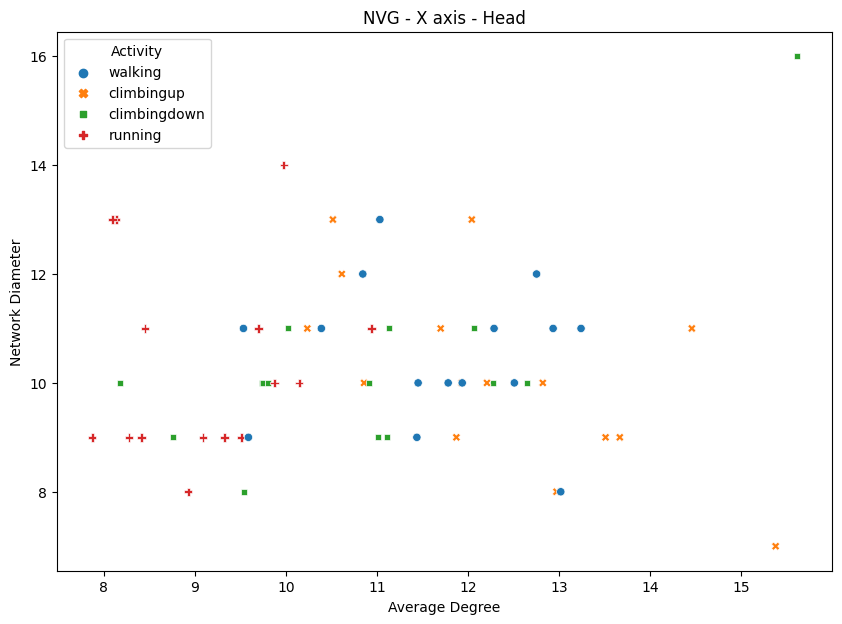

In [ ]:
#for all activities

#import neccessary packages
import seaborn as sns

#filter the dataframe
temp_df = final_table[(final_table.Method == 'NVG') & (final_table['Accelerometer Axis'] == 'x')]

#create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 7))

# create the scatter plot with color and style based on activity
sns.scatterplot(data=temp_df, x='Average Degree', y='Network Diameter', hue='Activity', style='Activity', ax=ax)

# set the title and plot
ax.set_title('NVG - X axis - Head')
ax.set_xlabel('Average Degree')
ax.set_ylabel('Network Diameter')

#show the plot
plt.show()


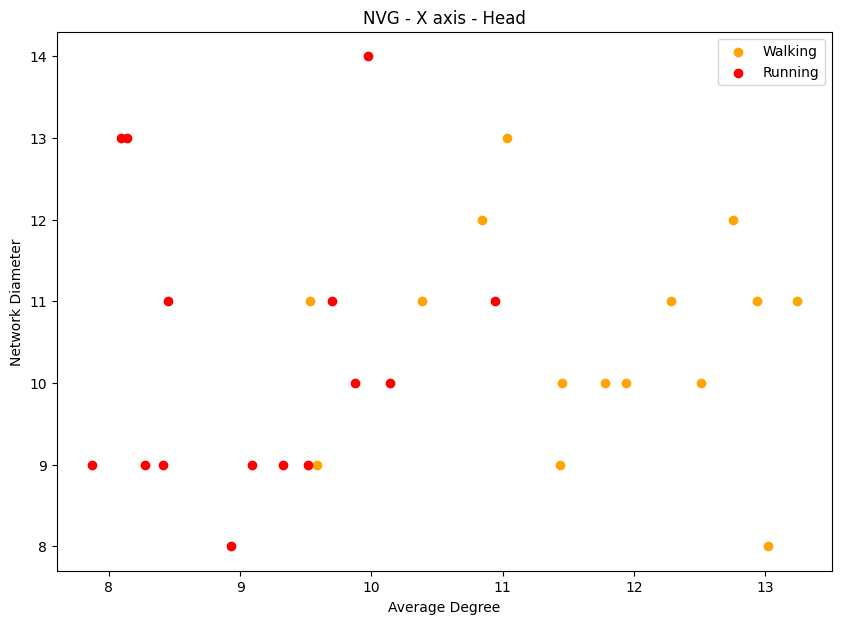

In [ ]:
#FILTER THE FINAL DATAFRAME FOR THE "NVG" METHOD AND "X" ACCELEROMETER AXIS
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']
#FURTHER FILTER THE DATAFRAME FOR 'WALKING' AND 'RUNING' ACTIVITIES
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

#CREATE A FIGURE OBJECT WITH SIZE 10*7
fig_size = plt.figure(figsize = (10, 7))

#PLOT A SCATTER PLOT FOR THE WALKING AND RUNNING ACTIVITIES USING THE 'AVERAGE DEGREE' AND 'NETWORK DIAMETER'
plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

#SET THE TITLE AND AXIS LABLES
plt.title('NVG - X axis - Head')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

#ADD A LEGEND AND SHOW THE PLOT
plt.legend()
plt.show()


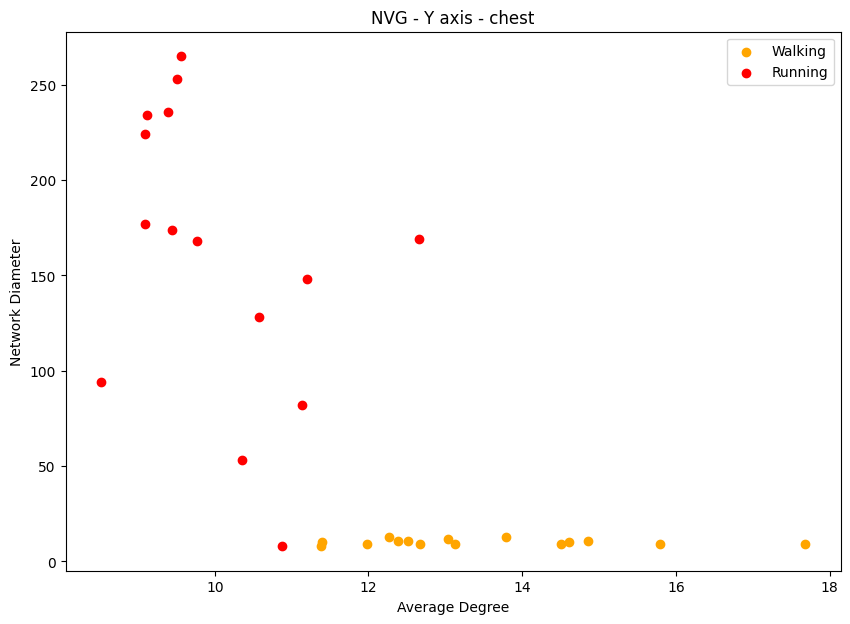

In [ ]:
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'y']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('NVG - Y axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

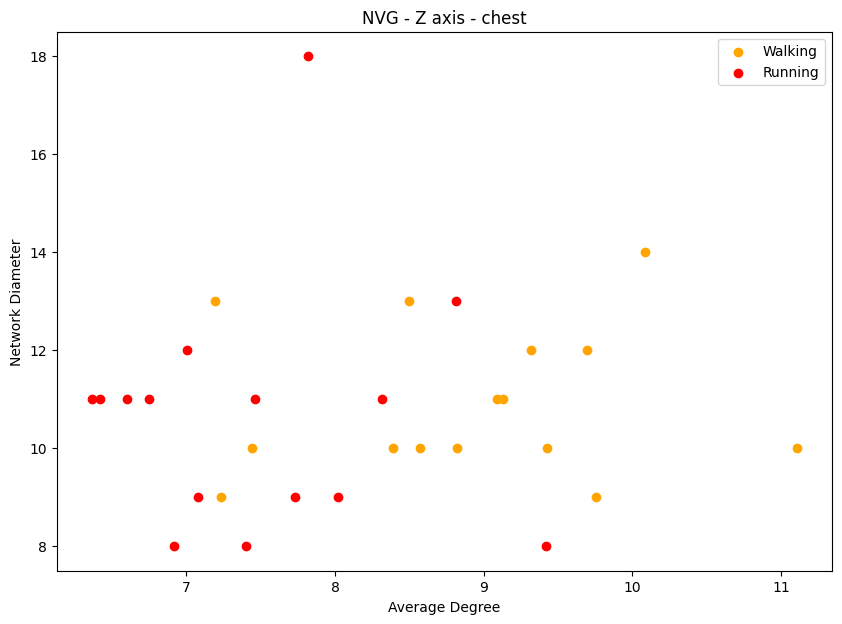

In [ ]:

temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'z']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('NVG - Z axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

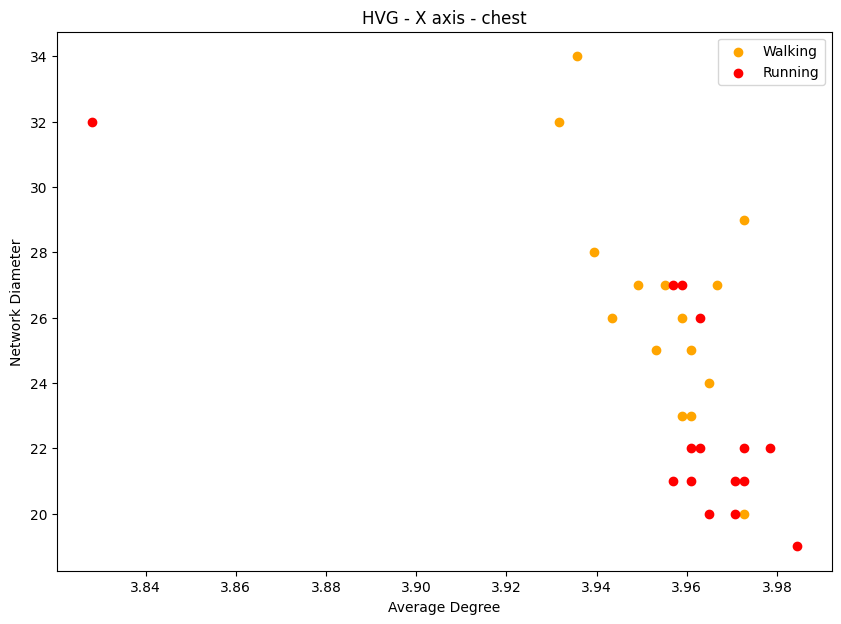

In [ ]:
#FILTER THE FINAL DATAFRAME FOR THE "HVG" METHOD AND "X" ACCELEROMETER AXIS

temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']
#FURTHER FILTER THE DATAFRAME FOR 'WALKING' AND 'RUNING' ACTIVITIES
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

#CREATE A FIGURE OBJECT WITH SIZE 10*7
fig_size = plt.figure(figsize = (10, 7))

#PLOT A SCATTER PLOT FOR THE WALKING AND RUNNING ACTIVITIES USING THE 'AVERAGE DEGREE' AND 'NETWORK DIAMETER'
plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

#SET THE TITLE AND AXIS LABLES
plt.title('HVG - X axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

#ADD A LEGEND AND SHOW THE PLOT
plt.legend()
plt.show()

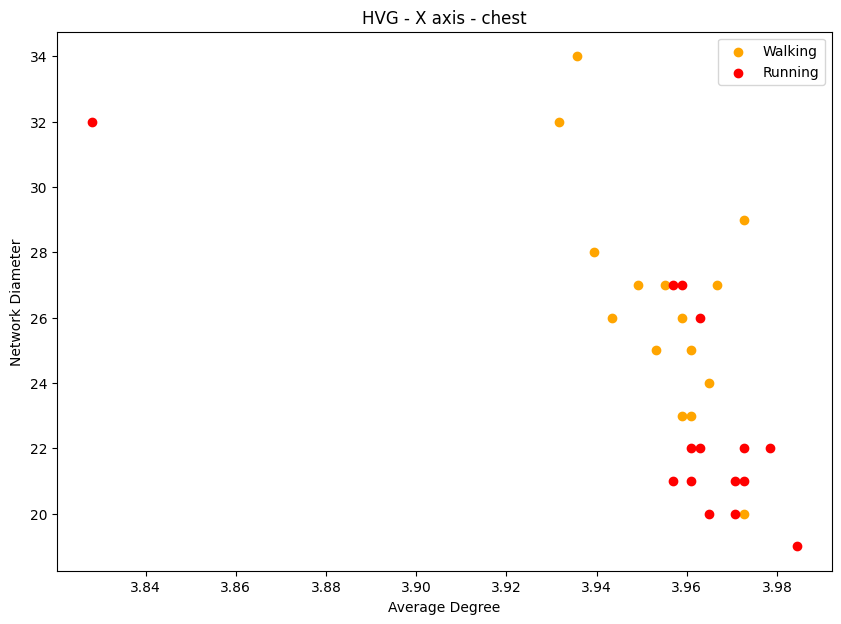

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('HVG - X axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

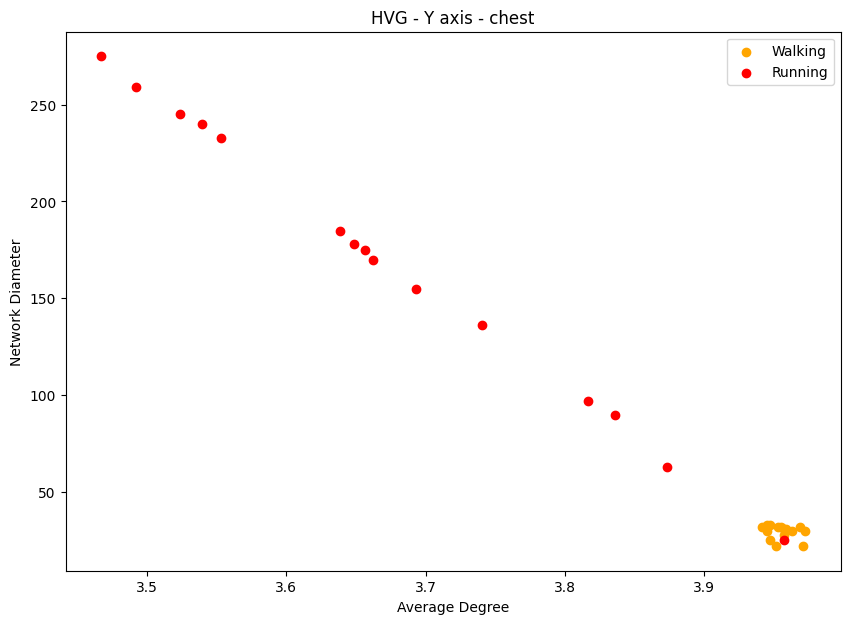

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'y']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('HVG - Y axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

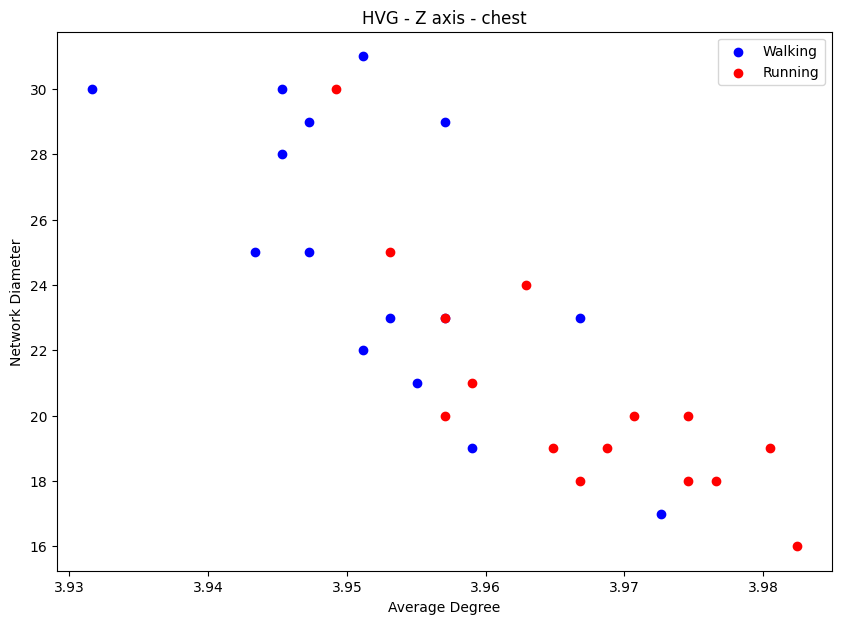

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'z']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='blue', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('HVG - Z axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

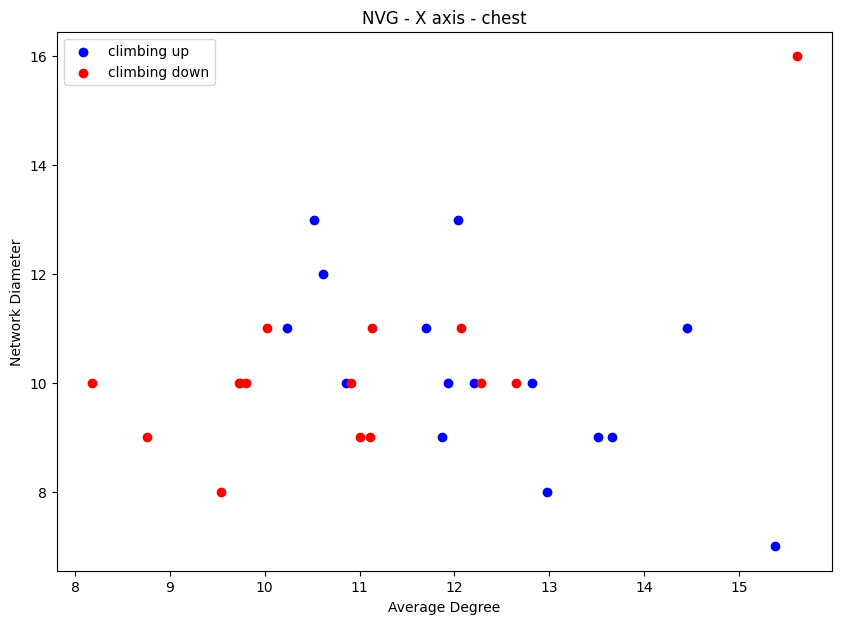

In [ ]:
#FILTER THE FINAL DATAFRAME FOR THE "NVG" METHOD AND "X" ACCELEROMETER AXIS
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']

#FURTHER FILTER THE DATAFRAME FOR 'CLIMBINGUP' AND 'CLIMBINGDOWN' ACTIVITIES
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

#CREATE A FIGURE OBJECT WITH SIZE 10*7
fig_size = plt.figure(figsize = (10, 7))

#PLOT A SCATTER PLOT FOR THE CLIMBINGUP AND CLIMBING DOWN ACTIVITIES USING THE 'AVERAGE DEGREE' AND 'NETWORK DIAMETER'
plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='blue', label = 'climbing up')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbing down')

#SET THE TITLE AND AXIS LABLES
plt.title('NVG - X axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

#ADD A LEGEND AND SHOW THE PLOT
plt.legend()
plt.show()

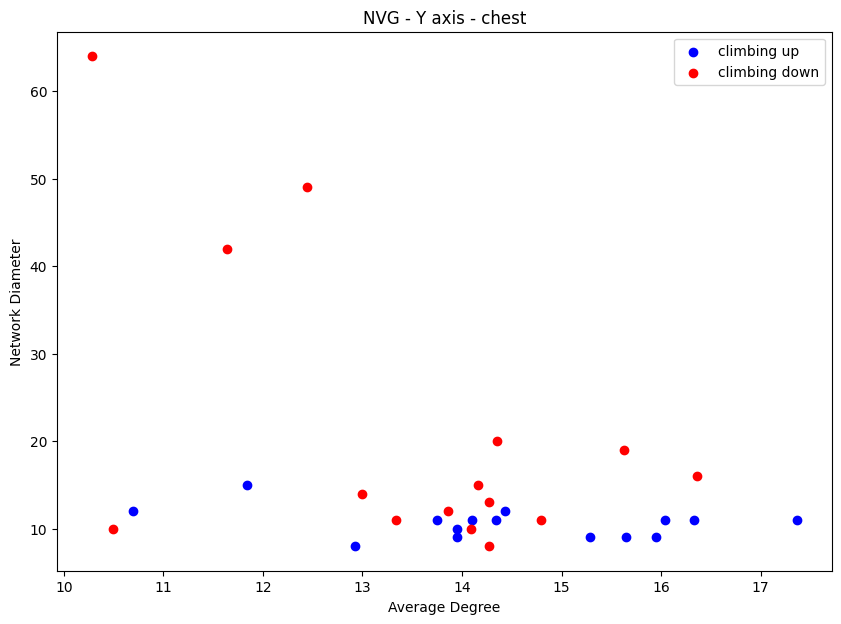

In [ ]:
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'y']
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='blue', label = 'climbing up')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbing down')

plt.title('NVG - Y axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

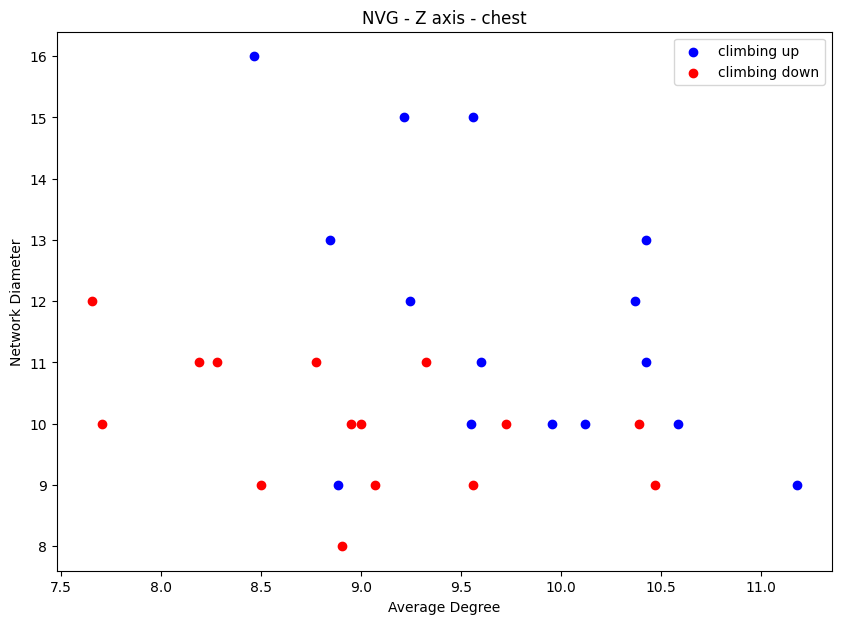

In [ ]:
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'z']
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='blue', label = 'climbing up')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbing down')

plt.title('NVG - Z axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

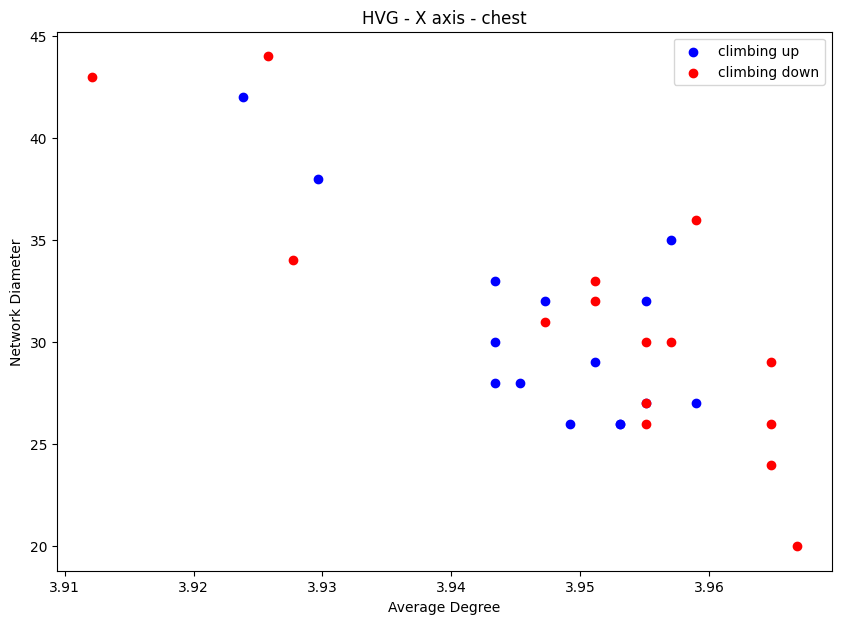

In [ ]:
#FILTER THE FINAL DATAFRAME FOR THE "NVG" METHOD AND "X" ACCELEROMETER AXIS
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']

#FURTHER FILTER THE DATAFRAME FOR 'CLIMBINGUP' AND 'CLIMBINGDOWN' ACTIVITIES
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

#CREATE A FIGURE OBJECT WITH SIZE 10*7
fig_size = plt.figure(figsize = (10, 7))

#PLOT A SCATTER PLOT FOR THE CLIMBINGUP AND CLIMBING DOWN ACTIVITIES USING THE 'AVERAGE DEGREE' AND 'NETWORK DIAMETER'
plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='blue', label = 'climbing up')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbing down')

#SET THE TITLE AND AXIS LABLES
plt.title('HVG - X axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

#ADD A LEGEND AND SHOW THE PLOT
plt.legend()
plt.show()

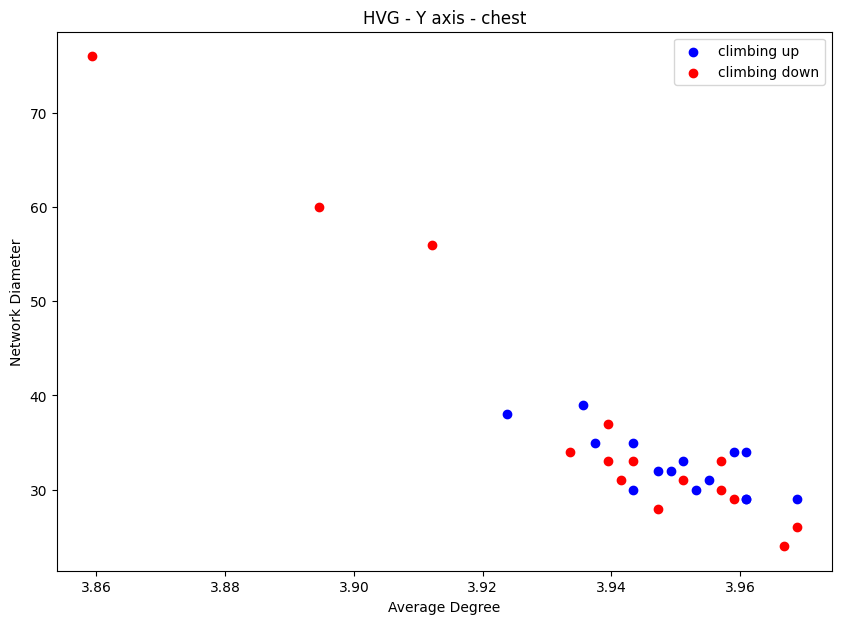

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'y']
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='blue', label = 'climbing up')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbing down')

plt.title('HVG - Y axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

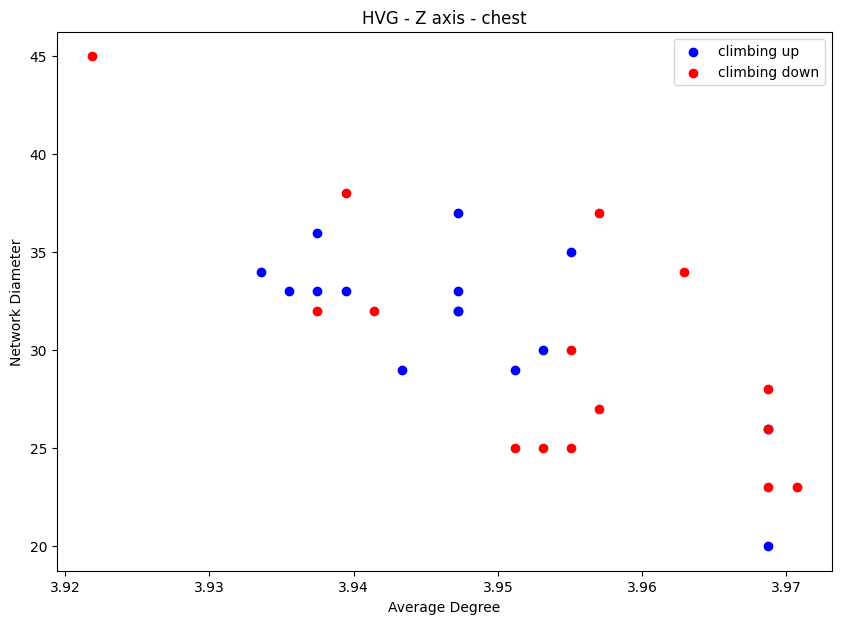

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'z']
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='blue', label = 'climbing up')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbing down')

plt.title('HVG - Z axis - chest')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

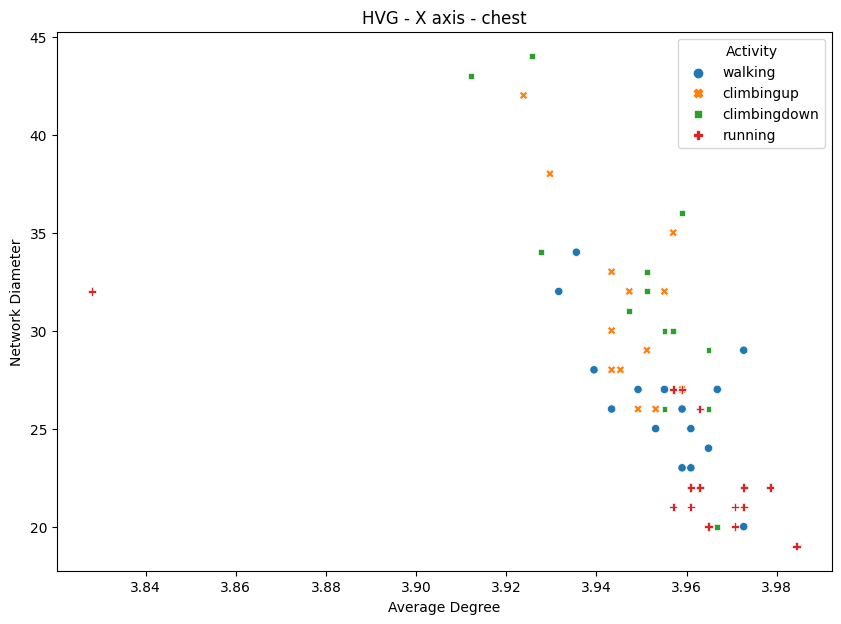

In [ ]:
#for all activities

# import necessary libraries
import seaborn as sns

#filter the data for the required conditions
temp_df = final_table[(final_table.Method == 'HVG') & (final_table['Accelerometer Axis'] == 'x')]

#set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

#create the scatter plot
sns.scatterplot(data=temp_df, x='Average Degree', y='Network Diameter', hue='Activity', style='Activity', ax=ax)

#set the title and lables
ax.set_title('HVG - X axis - chest')
ax.set_xlabel('Average Degree')
ax.set_ylabel('Network Diameter')

#show the plot
plt.show()

**FOR HEAD DATA SET TASK1**

In [ ]:
#for head data set
import os
import pandas as pd

# set the path to the directory containing the CSV files
path = '/content/drive/MyDrive/FDA PROJECT 2/Data head chest_Final (1)/DataHead'

# create an empty list to store the data
data = []

# loop through all the CSV files in the directory
for file_name in os.listdir(path):
    if file_name.endswith('.csv'):
        # read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(path, file_name))
        # append the DataFrame to the data list
        data.append(df)
        result = pd.concat(data, ignore_index=True)




In [ ]:

axis = ['x', 'y', 'z'] #DEFINE THE ACCELEROMETER AXES

#CREATE AN EMPTY PANDAS DATAFRAME WITH REQUIRED COLUMNS
final_table = pd.DataFrame(columns=['Method', 'Subject', 'Accelerometer Axis', 'Average Degree', 'Network Diameter', 'Average path length', 'Activity'])

#SET EHE FILEPATH TO READ THE CSV FILES
filepath = '/content/drive/MyDrive/FDA PROJECT 2/Data head chest_Final (1)/DataHead'
for filename in os.listdir(filepath):  # LOOP OVERALL THE FILES IN THE DIRECTORY AND EXTRACT DATA FROM CSV FILE
        if not filename.endswith('.csv'):   #CHECK IF THE FILES IS A CSV FILE
            continue
        activity = filename.split('_')[1]   #EXTRACT THE ACTIVITY FROM THE FILENAME
        df = pd.read_csv(os.path.join(filepath, filename)) #READ THE csv FILE AND EXTRACT SUBJECT ID FROM THE FILENAME
        i = filename.split('_')[len(filename.split('_'))-1].split('.')[0][1:]
        for a in axis:                                    #LOOP OVER ALL THE ACCELEROMETR AXES
            ngraph.build(df[f'attr_{a}'][1000:2024])      #BUILD THE NGRAPH FOR THE CURRENT ACCELEROMETER AXIS DATA
            igraph_ngraph = ngraph.as_igraph()
            avd = np.mean(igraph_ngraph.degree())
            nd = igraph_ngraph.diameter()
            apl = igraph_ngraph.average_path_length()
            final_table.loc[len(final_table)] = ['NVG', i, a, avd, nd, apl, activity]   # ADD THE DATA TO THE FINAL TABLE
            hgraph.build(df[f'attr_{a}'][1000:2024])     # BUILD THE HGRAPH FOR THE CURRENT ACCELEROMETER AXIS DATA
            igraph_hgraph = hgraph.as_igraph()
            avd = np.mean(igraph_hgraph.degree())
            nd = igraph_hgraph.diameter()
            apl = igraph_hgraph.average_path_length()
            final_table.loc[len(final_table)] = ['HVG', i, a, avd, nd, apl, activity]    #ADD THE DATA TO THE FINAL TABLE




In [ ]:
final_table

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average path length,Activity
0,NVG,4,x,10.248047,13,5.358955,walking
1,HVG,4,x,3.917969,42,18.966537,walking
2,NVG,4,y,15.035156,7,4.143103,walking
3,HVG,4,y,3.960938,27,11.850986,walking
4,NVG,4,z,10.968750,10,4.527294,walking
...,...,...,...,...,...,...,...
355,HVG,13,x,3.945312,34,16.068335,walking
356,NVG,13,y,13.781250,10,4.494419,walking
357,HVG,13,y,3.949219,37,13.481505,walking
358,NVG,13,z,15.369141,10,4.381308,walking


**PLOTING THE HVG AND NVG GRAPHS FOR HEAD TASK 1**

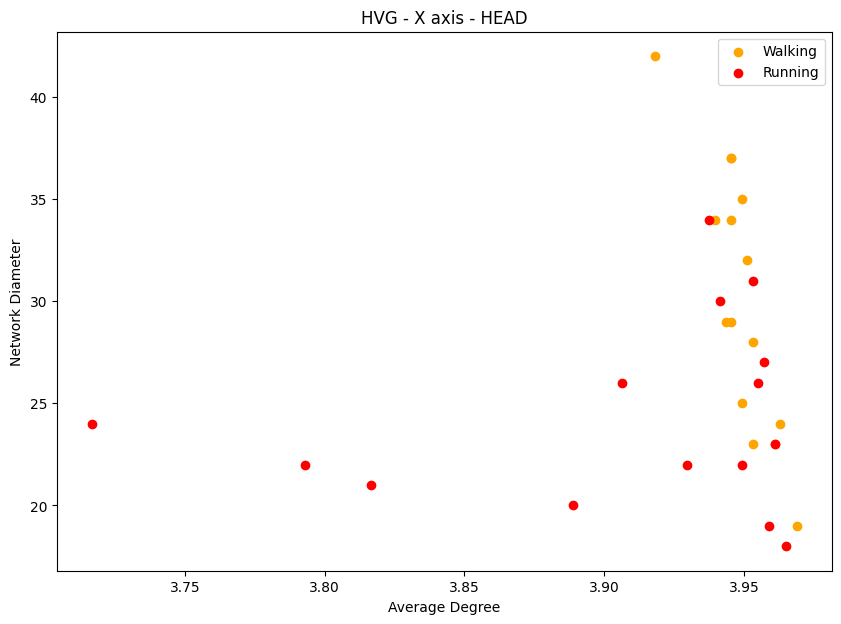

In [ ]:
#FILTER THE FINAL DATAFRAME FOR THE "HVG" METHOD AND "X" ACCELEROMETER AXIS
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']

#FURTHER FILTER THE DATAFRAME FOR 'WALKING' AND 'RUNNING' ACTIVITIES
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

#CREATE A FIGURE OBJECT WITH SIZE 10*7
fig_size = plt.figure(figsize = (10, 7))

#PLOT A SCATTER PLOT FOR THE WALKING AND RUNNING ACTIVITIES USING THE 'AVERAGE DEGREE' AND 'NETWORK DIAMETER'
plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

#SET THE TITLE AND AXIS LABLES
plt.title('HVG - X axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

#ADD A LEGEND AND SHOW THE PLOT
plt.legend()
plt.show()

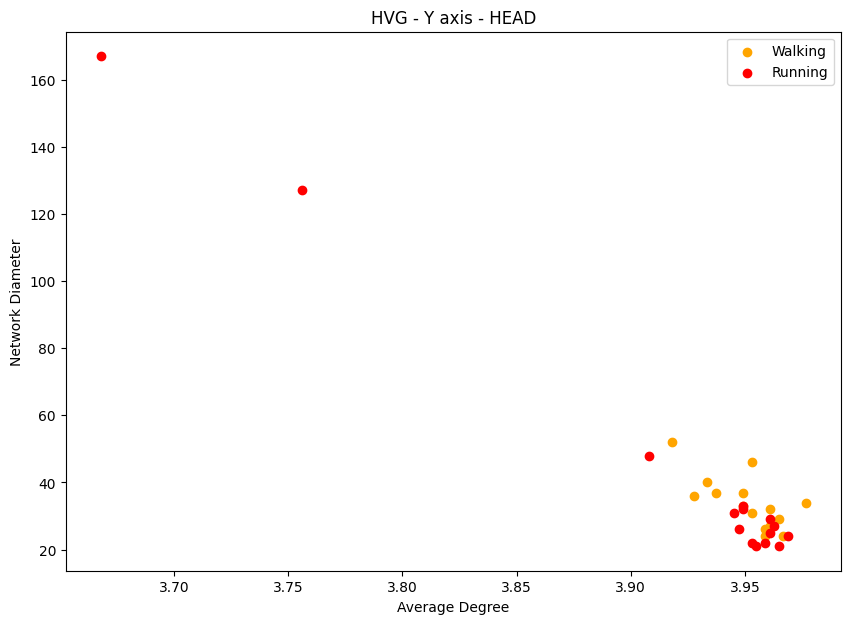

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'y']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('HVG - Y axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

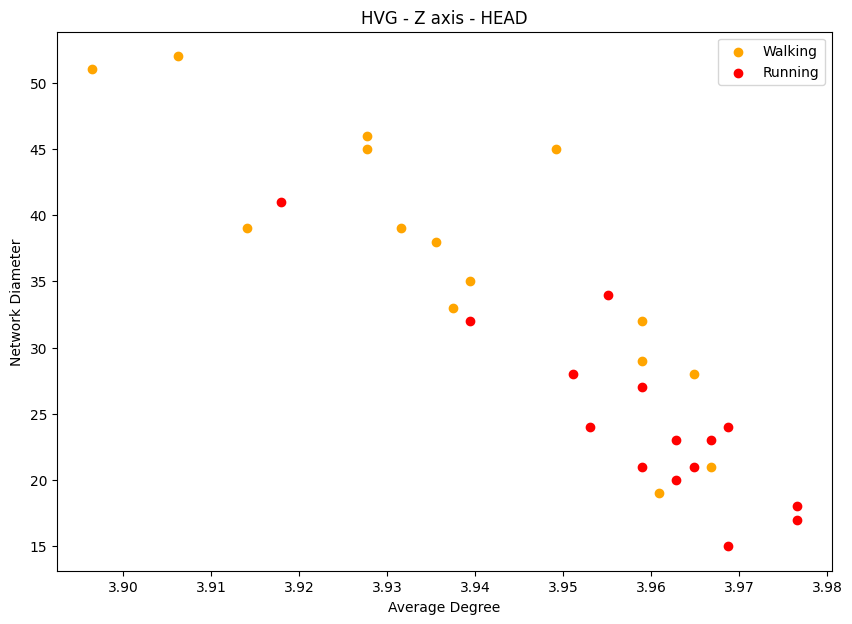

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'z']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('HVG - Z axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

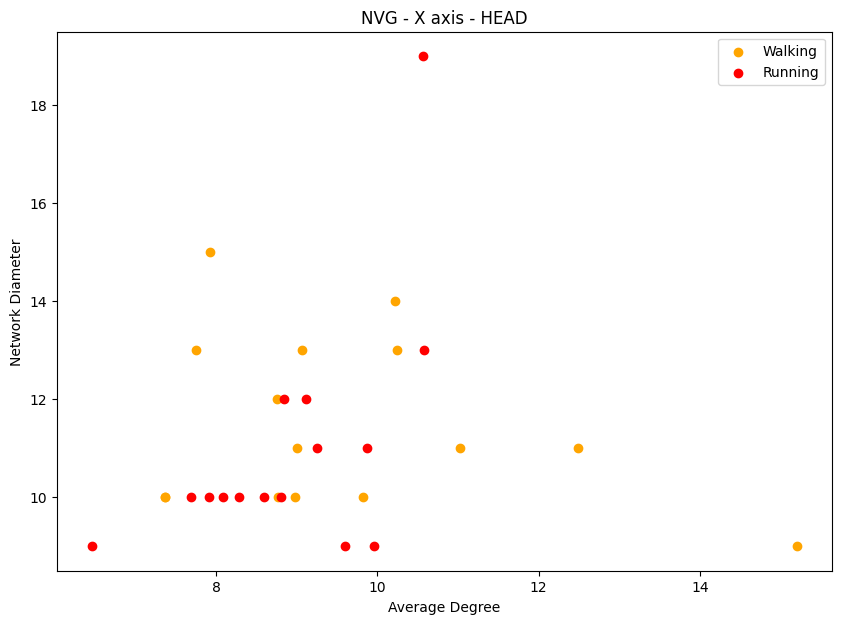

In [ ]:
#FILTER THE FINAL DATAFRAME FOR THE "NVG" METHOD AND "X" ACCELEROMETER AXIS
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']

#FURTHER FILTER THE DATAFRAME FOR 'WALKING' AND 'RUNNING' ACTIVITIES
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

#CREATE A FIGURE OBJECT WITH SIZE 10*7
fig_size = plt.figure(figsize = (10, 7))

#PLOT A SCATTER PLOT FOR THE WALKING AND RUNNING ACTIVITIES USING THE 'AVERAGE DEGREE' AND 'NETWORK DIAMETER'
plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

#SET THE TITLE AND AXIS LABLES
plt.title('NVG - X axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

#ADD A LEGEND AND SHOW THE PLOT
plt.legend()
plt.show()

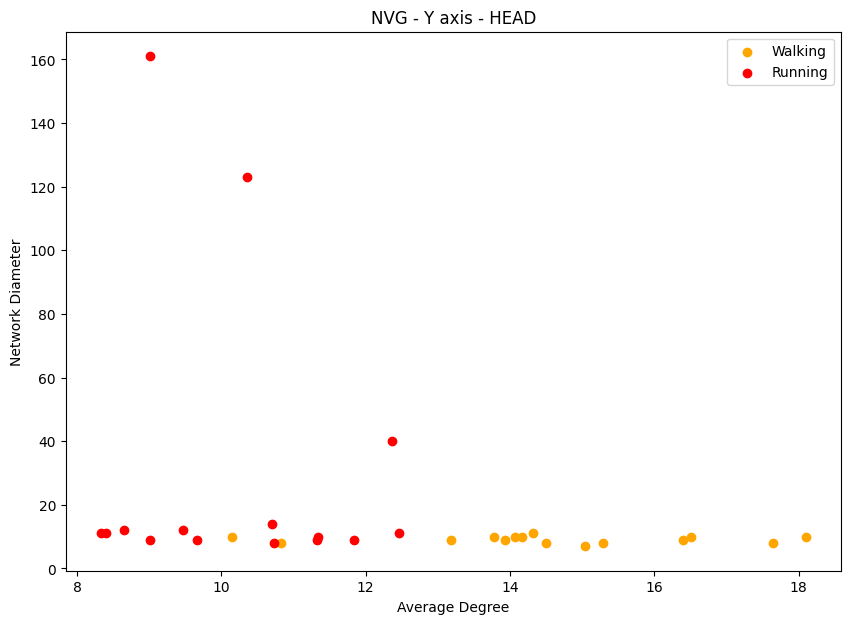

In [ ]:
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'y']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('NVG - Y axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

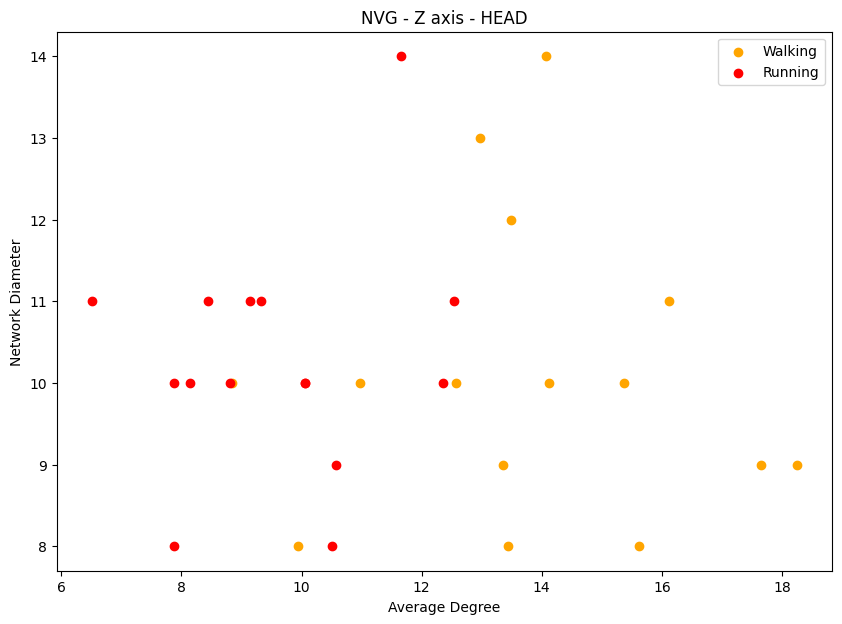

In [ ]:
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'z']
temp_df_walking = temp_df[temp_df.Activity == 'walking']
temp_df_running = temp_df[temp_df.Activity == 'running']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'Walking')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'Running')

plt.title('NVG - Z axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

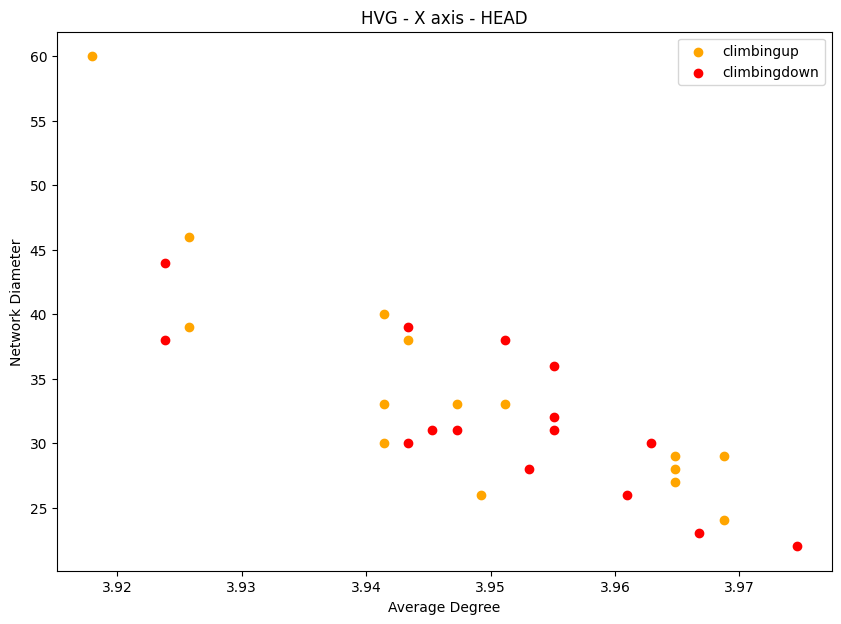

In [ ]:
#FILTER THE FINAL DATAFRAME FOR THE "HVG" METHOD AND "X" ACCELEROMETER AXIS
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']

#FURTHER FILTER THE DATAFRAME FOR 'CLIMBINGUP' AND 'CLIMBINGDOWN' ACTIVITIES
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

#CREATE A FIGURE OBJECT WITH SIZE 10*7
fig_size = plt.figure(figsize = (10, 7))

#PLOT A SCATTER PLOT FOR THE CLIMBINGUP AND CLIMBING DOWN ACTIVITIES USING THE 'AVERAGE DEGREE' AND 'NETWORK DIAMETER'
plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'climbingup')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbingdown')

#SET THE TITLE AND AXIS LABLES
plt.title('HVG - X axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

#ADD A LEGEND AND SHOW THE PLOT
plt.legend()
plt.show()

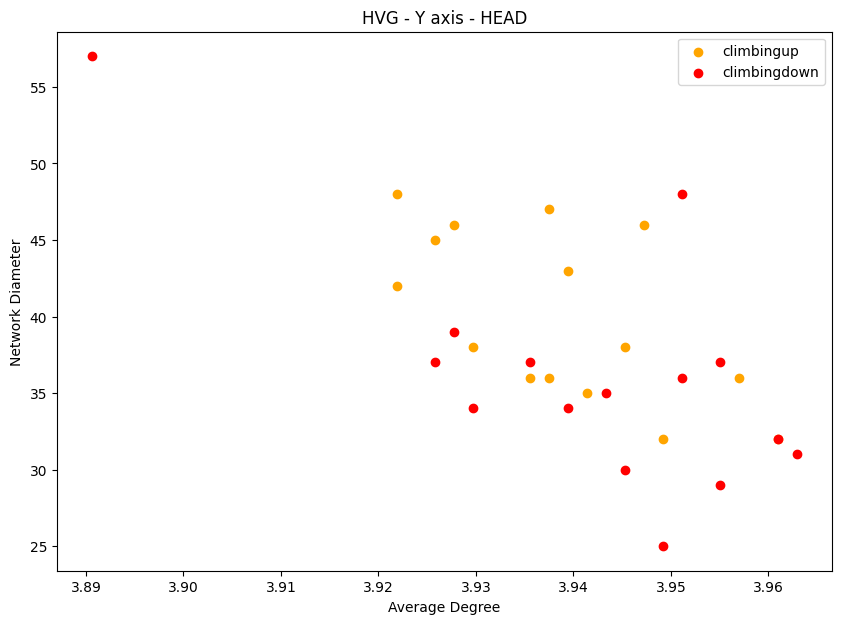

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'y']
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'climbingup')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbingdown')

plt.title('HVG - Y axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

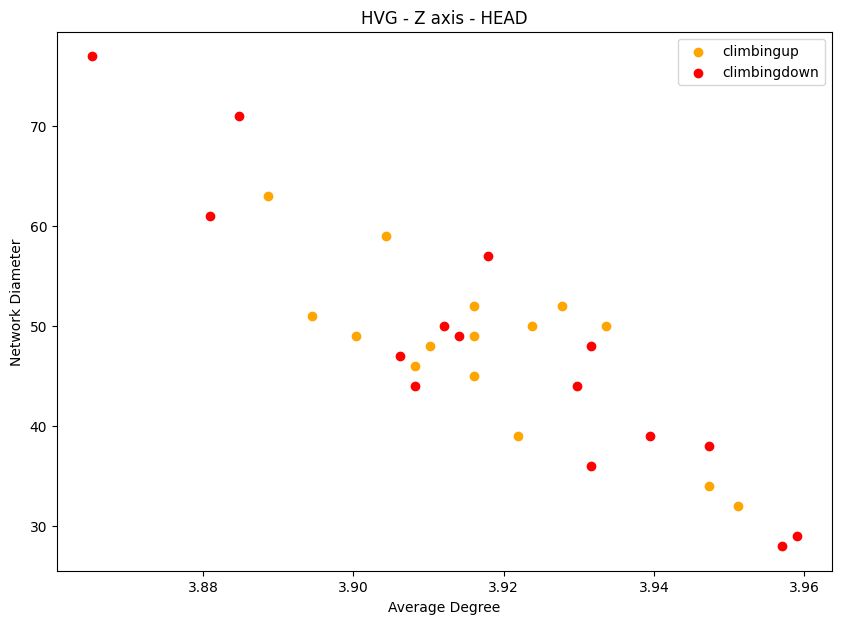

In [ ]:
temp_df = final_table[final_table.Method == 'HVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'z']
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'climbingup')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbingdown')

plt.title('HVG - Z axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

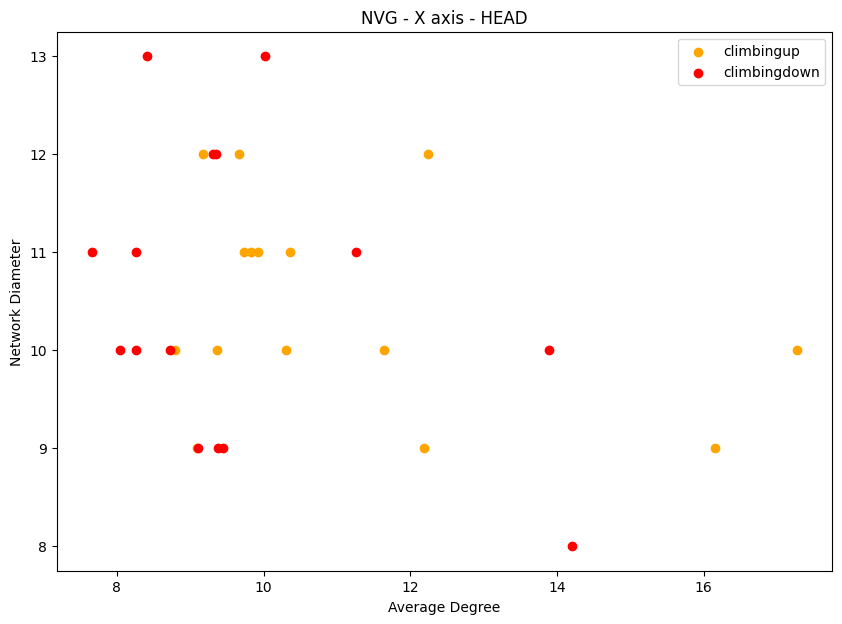

In [ ]:
#FILTER THE FINAL DATAFRAME FOR THE "NVG" METHOD AND "X" ACCELEROMETER AXIS
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'x']

#FURTHER FILTER THE DATAFRAME FOR 'CLIMBINGUP' AND 'CLIMBINGDOWN' ACTIVITIES
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

#CREATE A FIGURE OBJECT WITH SIZE 10*7
fig_size = plt.figure(figsize = (10, 7))

#PLOT A SCATTER PLOT FOR THE CLIMBINGUP AND CLIMBING DOWN ACTIVITIES USING THE 'AVERAGE DEGREE' AND 'NETWORK DIAMETER'
plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'climbingup')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbingdown')

#SET THE TITLE AND AXIS LABLES
plt.title('NVG - X axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

#ADD A LEGEND AND SHOW THE PLOT
plt.legend()
plt.show()

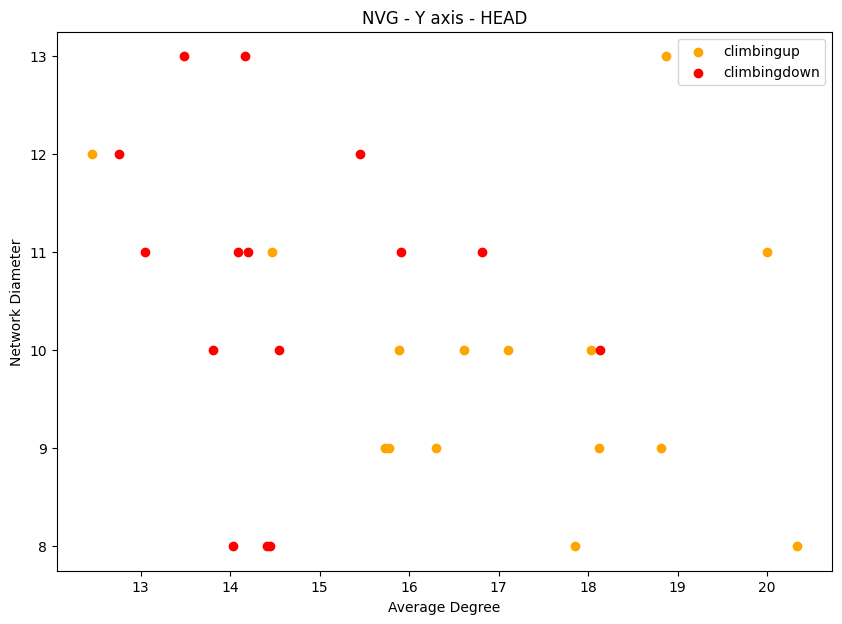

In [ ]:
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'y']
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'climbingup')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbingdown')

plt.title('NVG - Y axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

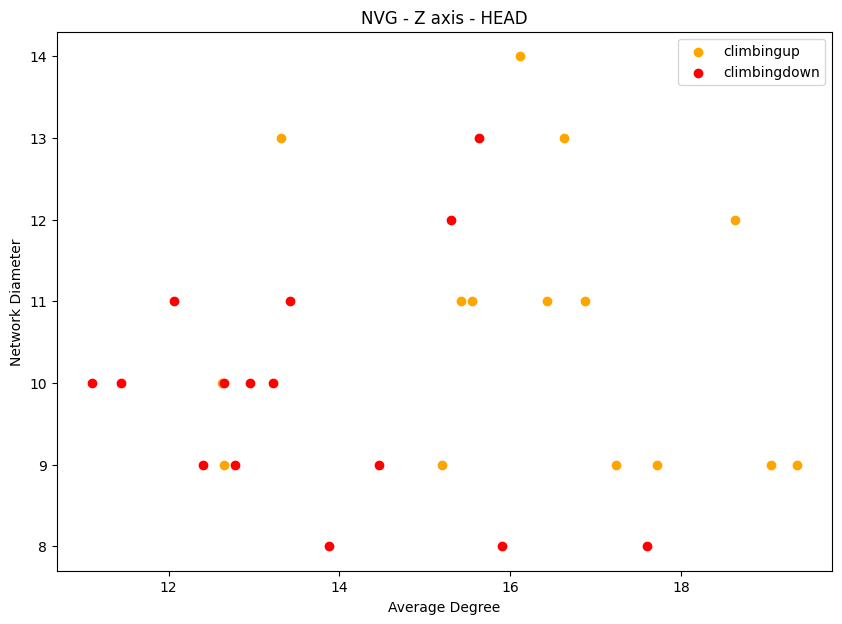

In [ ]:
temp_df = final_table[final_table.Method == 'NVG']
temp_df = temp_df[temp_df['Accelerometer Axis'] == 'z']
temp_df_walking = temp_df[temp_df.Activity == 'climbingup']
temp_df_running = temp_df[temp_df.Activity == 'climbingdown']

fig_size = plt.figure(figsize = (10, 7))

plt.scatter(temp_df_walking['Average Degree'], temp_df_walking['Network Diameter'], c='orange', label = 'climbingup')
plt.scatter(temp_df_running['Average Degree'], temp_df_running['Network Diameter'], c='red', label = 'climbingdown')

plt.title('NVG - Z axis - HEAD')
plt.xlabel('Average Degree')
plt.ylabel('Network Diameter')

plt.legend()
plt.show()

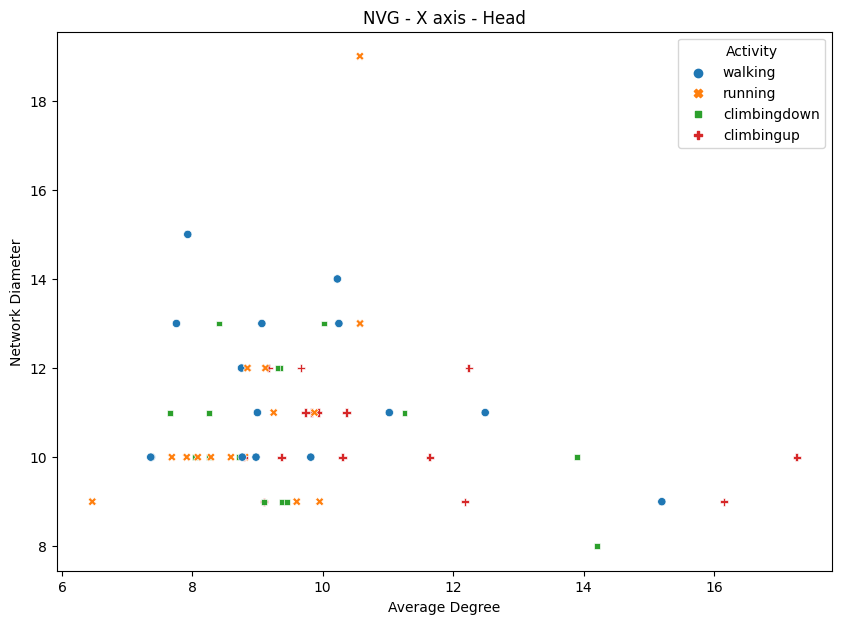

In [ ]:
#for all activities

#import necessary libraries
import seaborn as sns

#filter the data for the rewuired conditions
temp_df = final_table[(final_table.Method == 'NVG') & (final_table['Accelerometer Axis'] == 'x')]

#set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

#create the scatter plot
sns.scatterplot(data=temp_df, x='Average Degree', y='Network Diameter', hue='Activity', style='Activity', ax=ax)

#set the title and lables
ax.set_title('NVG - X axis - Head')
ax.set_xlabel('Average Degree')
ax.set_ylabel('Network Diameter')

#show the plot
plt.show()


**TASK 2**

In [ ]:
import os
import pandas as pd

# set the path to the directory containing the CSV files
path = '/content/drive/MyDrive/FDA PROJECT 2/Data head chest_Final (1)/DataChest'

# create an empty list to store the data
data = []

# loop through all the CSV files in the directory
for file_name in os.listdir(path):
    if file_name.endswith('.csv'):
        # read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(path, file_name))
        # append the DataFrame to the data list
        data.append(df)
        result = pd.concat(data, ignore_index=True)

**IMPORTING LIBRARIES**

In [ ]:
import seaborn as sns
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

**#github code by professor**

libraries picked from the following link
https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py


In [ ]:
import numpy as np


def s_entropy(freq_list):

    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):

    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])


def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):

    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

In [ ]:
axis = ['x', 'y', 'z']    # Define the accelerometer axes
# Create an empty Pandas DataFrame to store the results
final_table = pd.DataFrame(columns=['Subject', 'Accelerometer Axis', 'signal length', 'dimension', 'delay','permutation entropy','complexity', 'Activity'])
filepath = '/content/drive/MyDrive/FDA PROJECT 2/Data head chest_Final (1)/DataChest'  # Set the filepath where the data files are stored
for files in os.listdir(filepath):                     # Loop over all files in the filepath
    sensor = str(files).rstrip('.csv').split('_')[-1]  # Extract the sensor and activity information from the filename
    activity = str(files).rstrip('.csv').split('_')[1]
    df = pd.read_csv(filepath+'/'+files)               # Read in the data file as a Pandas DataFrame
    i = files.split('_')[len(files.split('_'))-1].split('.')[0][1:]       # Extract the subject ID from the filename
    for a in axis:         # Loop over all accelerometer axes, dimensions, delays, and signal lengths
      for dimension in [3,4,5,6]:
        for delay in [1,2,3]:
          for signal in [2024, 3048, 5096]:      # Calculate the ordinal patterns, permutation entropy, and complexity of the time series
                x = ordinal_patterns(df['attr_'+a][1000:signal], dimension, delay)
                y = p_entropy(x)
                z = complexity(x)
                final_table.loc[len(final_table)] = [i, a, signal, dimension, delay, y, z, activity]         # Add the results to the final table



In [ ]:
final_table

,Subject,Accelerometer Axis,signal length,dimension,delay,permutation entropy,complexity,Activity
0,4,x,2024,3,1,0.893753,0.091145,walking
1,4,x,3048,3,1,0.891408,0.092802,walking
2,4,x,5096,3,1,0.889241,0.094494,walking
3,4,x,2024,3,2,0.982897,0.016273,walking
4,4,x,3048,3,2,0.981365,0.017815,walking
...,...,...,...,...,...,...,...,...
6475,7,z,3048,6,2,0.946968,0.108911,walking
6476,7,z,5096,6,2,0.943392,0.120496,walking
6477,7,z,2024,6,3,0.945082,0.102998,walking
6478,7,z,3048,6,3,0.938873,0.121338,walking


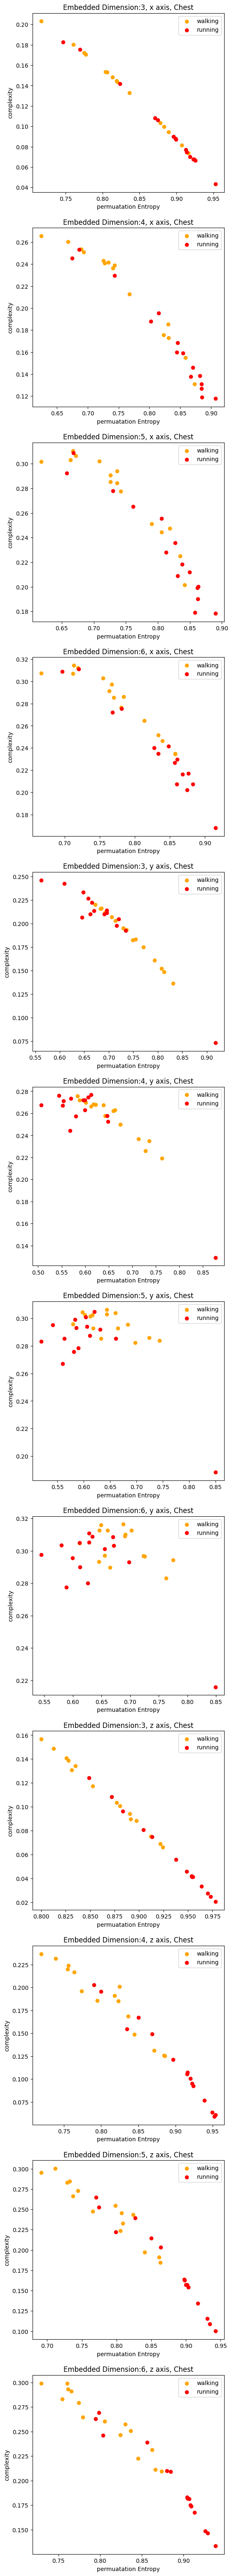

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax= plt.subplots(12,figsize=(6, 80))
count=0;
accel=["x","y","z"]
dimensions=[3,4,5,6]
for x in accel:
  for dim in dimensions:
# Select the data for the scatter plot
      plt_df = final_table[(final_table['signal length'] == 5096) &
                     (final_table['Accelerometer Axis'] == x) &
                     (final_table['dimension'] == dim) &
                     (final_table['delay'] == 1)]
# create and seperate dataframes for walking and running activities
      plt_df_walking = plt_df[plt_df['Activity'] == 'walking']
      plt_df_running = plt_df[plt_df['Activity'] == 'running']



      ax[count].scatter(x=plt_df_walking['permutation entropy'], y=plt_df_walking['complexity'],
                color='orange', label='walking')
      ax[count].scatter(x=plt_df_running['permutation entropy'], y=plt_df_running['complexity'],
                color='red', label='running')

# Set the title and labels
      ax[count].set_title('Embedded Dimension:'+str(dim)+', '+x+' axis, Chest')
      ax[count].set_xlabel('permuatation Entropy')
      ax[count].set_ylabel('complexity')
      ax[count].legend()
      count=count+1




# Show the legend and plot



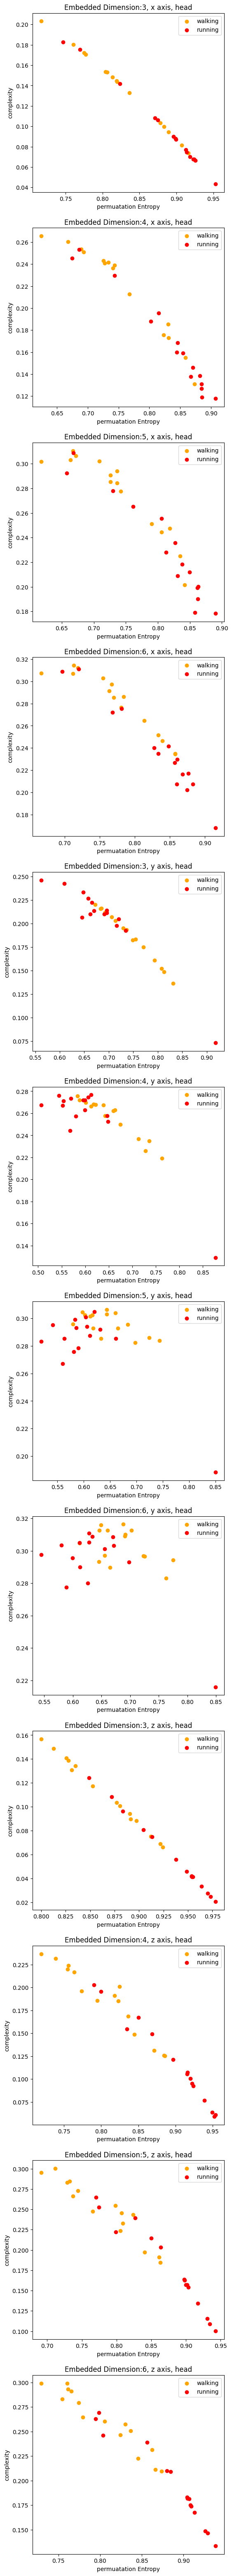

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax= plt.subplots(12,figsize=(6, 80))
count=0;
accel=["x","y","z"]
dimensions=[3,4,5,6]
for x in accel:
  for dim in dimensions:
# Select the data for the scatter plot
      plt_df = final_table[(final_table['signal length'] == 5096) &
                     (final_table['Accelerometer Axis'] == x) &
                     (final_table['dimension'] == dim) &
                     (final_table['delay'] == 1)]
# create and seperate dataframes for walking and running activities
      plt_df_walking = plt_df[plt_df['Activity'] == 'walking']
      plt_df_running = plt_df[plt_df['Activity'] == 'running']



      ax[count].scatter(x=plt_df_walking['permutation entropy'], y=plt_df_walking['complexity'],
                color='orange', label='walking')
      ax[count].scatter(x=plt_df_running['permutation entropy'], y=plt_df_running['complexity'],
                color='red', label='running')

# Set the title and labels
      ax[count].set_title('Embedded Dimension:'+str(dim)+', '+x+' axis, head')
      ax[count].set_xlabel('permuatation Entropy')
      ax[count].set_ylabel('complexity')
      ax[count].legend()
      count=count+1




# Show the legend and plot



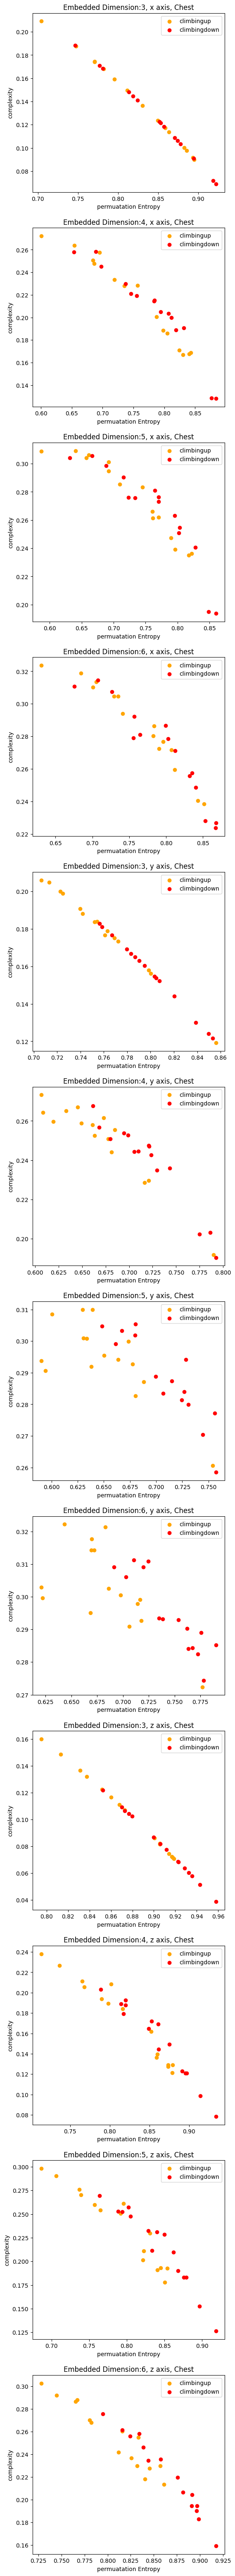

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax= plt.subplots(12,figsize=(6, 80))
count=0;
accel=["x","y","z"]
dimensions=[3,4,5,6]
for x in accel:
  for dim in dimensions:
# Select the data for the scatter plot
      plt_df = final_table[(final_table['signal length'] == 5096) &
                     (final_table['Accelerometer Axis'] == x) &
                     (final_table['dimension'] == dim) &
                     (final_table['delay'] == 1)]
# create and seperate dataframes for walking and running activities
      plt_df_walking = plt_df[plt_df['Activity'] == 'climbingup']
      plt_df_running = plt_df[plt_df['Activity'] == 'climbingdown']



      ax[count].scatter(x=plt_df_walking['permutation entropy'], y=plt_df_walking['complexity'],
                color='orange', label='climbingup')
      ax[count].scatter(x=plt_df_running['permutation entropy'], y=plt_df_running['complexity'],
                color='red', label='climbingdown')

# Set the title and labels
      ax[count].set_title('Embedded Dimension:'+str(dim)+', '+x+' axis, Chest')
      ax[count].set_xlabel('permuatation Entropy')
      ax[count].set_ylabel('complexity')
      ax[count].legend()
      count=count+1




# Show the legend and plot



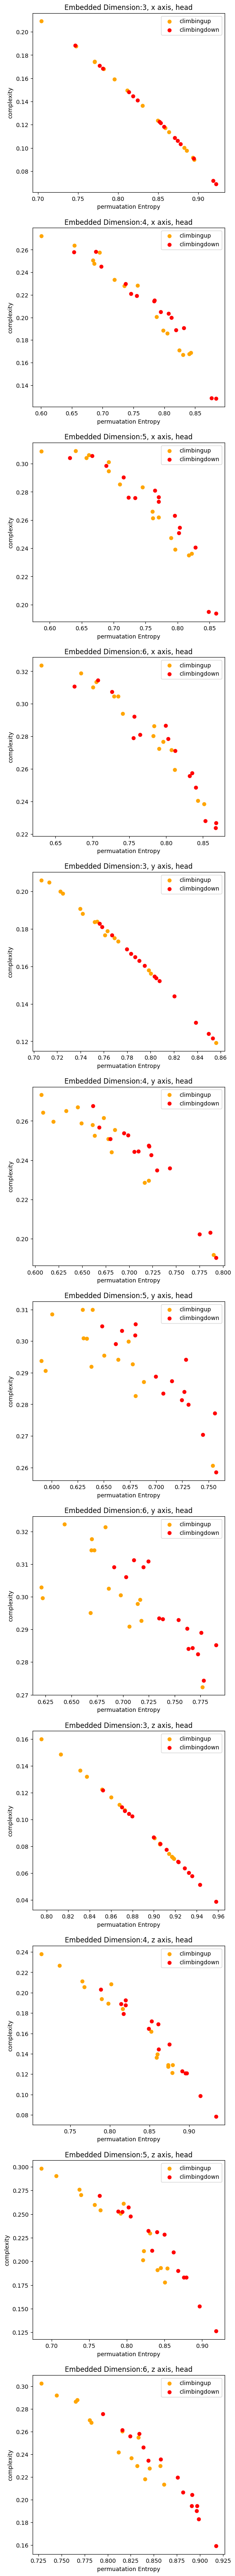

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax= plt.subplots(12,figsize=(6, 80))
count=0;
accel=["x","y","z"]
dimensions=[3,4,5,6]
for x in accel:
  for dim in dimensions:
# Select the data for the scatter plot
      plt_df = final_table[(final_table['signal length'] == 5096) &
                     (final_table['Accelerometer Axis'] == x) &
                     (final_table['dimension'] == dim) &
                     (final_table['delay'] == 1)]
# create and seperate dataframes for walking and running activities
      plt_df_walking = plt_df[plt_df['Activity'] == 'climbingup']
      plt_df_running = plt_df[plt_df['Activity'] == 'climbingdown']



      ax[count].scatter(x=plt_df_walking['permutation entropy'], y=plt_df_walking['complexity'],
                color='orange', label='climbingup')
      ax[count].scatter(x=plt_df_running['permutation entropy'], y=plt_df_running['complexity'],
                color='red', label='climbingdown')

# Set the title and labels
      ax[count].set_title('Embedded Dimension:'+str(dim)+', '+x+' axis, head')
      ax[count].set_xlabel('permuatation Entropy')
      ax[count].set_ylabel('complexity')
      ax[count].legend()
      count=count+1




# Show the legend and plot

